## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Ho : the network latency has reduced or no change with the new internet provider

Ha : the network latency has increased with the new internet provider

True negative: the new internet provider has decreased latency

True Positive: the new internet provider has increased latency

False positive (type1): the new internet states that the latency has increased but the current status is a decrease in latency

False Negative (type2) - (double negative): the new internet states that the latency has decreased but the current status is a increase in latency


## Is the website redesign any good?
- Has traffic increased?


Ho : website traffic has decreased or no change since the new website design

Ha: website traffic has increased since the new website deisgn

True Negative: the new website has seen a decrease in traffic 

True Positive: the new website has seen an increase in traffoc

False Positive(type1): the website claims that traffic has increased but the reality is there is no change or it has decreased since the new redesign


False Negative(type2): the website claims that the traffic has decreased but the reality is that there is an increase in the traffic since the redesign

## Is our television ad driving more sales?
- has revenue increased?

Ho : the television ad did not drive more sales or they stayed the same

Ha: the television add increased sales and revenue

True Negative: we think 

True Positive : we think sales went up with the new ad and they did by increasing revenue and sales

False Positive (type1): we think that the new ad drove sales up, but they did not increase revenue

False Negative (type2): We do not think sales went up, but our revenue and sales did increase

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
#office 1
#40 sales, mean 90, std 15

#office 2
#50 sales, mean 100, std 20
#.05 alpha


H0 = the mean it takes to sell for office 1 == the mean it tajes to sell office 2

HA = the mean it takes to sell for office 1 != the mean it takes for office 2

In [ ]:
#(mean, std, trials)
office_1 = np.random.normal(90, 15, 40)
office_1


In [ ]:

office_2 = np.random.normal(100, 20, 50)
office_2

In [ ]:
#Ravinder's - Visualize two distributions:

x = np.arrange(50, 150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)



In [ ]:
#Independent T-Test & asking for difference
alpha = .05

In [ ]:
t, p = stats.ttest_ind(office_1, office_2, equal_var = False)
t, p, alpha

In [ ]:
p < alpha

## Load the mpg dataset and use it to answer the following questions:

In [ ]:
df = data("mpg")
df.head()

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


H0 = mean amount of fuel efficiency 2008 cars == mean amount of fuel efficiency 1999 cars
HA = mean amount of fuel efficiency 2008 cars != mean amount of fuel efficiency 1999 cars

In [ ]:
df['fuel_efficiency'] = ((df.cty + df.hwy)/2)
df

In [ ]:
cars_2008 = df[df.year == 2008].fuel_efficiency
cars_1999 = df[df.year == 1999].fuel_efficiency

In [ ]:
cars_2008.var(), cars_1999.var()

In [ ]:
cars_2008.hist()

In [ ]:
cars_1999.hist()

In [ ]:
t, p = stats.ttest_ind(cars_2008, cars_1999)
t, p, alpha

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

### Are compact cars more fuel-efficient than the average car?


H0 : compact cars fuel efficiency <= average cars fuel efficiency

HA : compact cars fuel efficiency > average cars fuel efficiency

In [ ]:
df.head()

In [ ]:
df['class'].value_counts()

In [ ]:
compact_cars = df[df['class'] == 'compact'].fuel_efficiency


In [ ]:
compact_cars.hist()

In [ ]:
compact_cars.mean()

In [ ]:
compact_mean = compact_cars.mean()
compact_mean

In [ ]:
compact_cars.describe()

In [ ]:
average_car = df['fuel_efficiency']
average_car

In [ ]:
t, p = stats.ttest_1samp(compact_cars, average_car.mean())
t, p/2, alpha

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

### Do manual cars get better gas mileage than automatic cars?

In [ ]:
automatic = df[df['trans'].str.contains("auto")]
manual = df[df['trans'].str.contains("manual")]

In [ ]:
automatic['fuel_efficiency'].hist()

In [ ]:
manual['fuel_efficiency'].hist()

In [ ]:
automatic.fuel_efficiency.var()

In [ ]:
manual.fuel_efficiency.var()

In [ ]:
t, p = stats.ttest_ind(manual.fuel_efficiency, automatic.fuel_efficiency, equal_var = True)
t, p

In [ ]:
p = p/2
p

In [ ]:
t

In [ ]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [42]:
df = pd.read_csv("Telco_Churn.csv")
telco_churn = pd.DataFrame(df)
telco_churn = telco_churn.dropna()
telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Does Tenure correlate with Monthly Charges

H0 : There is no correlation between tenure and monthly charges

HA: There is a correlation between tenure and monthly charges

<AxesSubplot:>

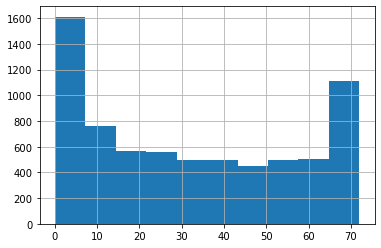

In [44]:
telco_churn['tenure'].hist()

<AxesSubplot:>

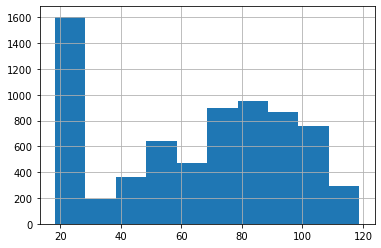

In [45]:
telco_churn['MonthlyCharges'].hist()

In [46]:
telco_churn['tenure'].var(), telco_churn['MonthlyCharges'].var()

(603.1681081237256, 905.4109343405128)

In [47]:
x= telco_churn['tenure']
y= telco_churn['MonthlyCharges']
alpha = 0.05

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [48]:
p < alpha

True

In [49]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


## Does tenure correlate with total charges?

H0: There is no correlation between tenure and total charges

HA: There is a correlation between tenure and monthly charges

<AxesSubplot:>

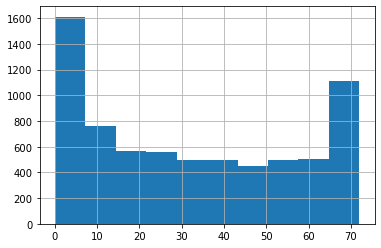

In [50]:
telco_churn['tenure'].hist()

In [62]:
#telco_churn['TotalCharges'].sort_values()

telco_churn = telco_churn.dropna()
telco_churn
#drop 11 values out of the 7000

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [63]:
#1) start here df.total_charges = df.total_charges.str.strip()
# Then 2) df = df[df.total_charges != ""]
# Finally 3) df.total_charges = df.total_charges.astype(float)

#Ryan's help:

1) start here df.total_charges = df.total_charges.str.strip()

Then 2) df = df[df.total_charges != ""]

 Finally 3) df.total_charges = df.total_charges.astype(float)

In [ ]:
# Joshua
# telco_churn['TotalCharges'] = telco_churn.TotalCharges.str.strip().str.replace(['', np.inf, -np.inf], np.nan).dropna()

In [56]:
telco_churn = telco_churn[telco_churn['TotalCharges'] != '']

In [64]:
telco_churn['TotalCharges'] = telco_churn['TotalCharges'].astype(float)

In [65]:
len(telco_churn)

7032

In [66]:
telco_churn['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64

<AxesSubplot:>

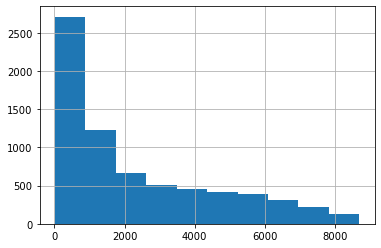

In [67]:
telco_churn['TotalCharges'].hist()

In [68]:
telco_churn['TotalCharges'].var()

5138252.40705357

In [69]:
x= telco_churn['tenure']
y= telco_churn['MonthlyCharges']
alpha = 0.05

corr, p = stats.pearsonr(telco_churn['tenure'], telco_churn['TotalCharges'])
corr, p

(0.8258804609332093, 0.0)

In [70]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### What happens if you control for phone and Total Charges?

Ho = Tenure with phone service does not correlate with Total Charges

Ha = Tenure with phone service does correlate with Total Charges

In [73]:
no_phone = telco_churn[telco_churn.PhoneService == "No"]
phone_cust = telco_churn[telco_churn.PhoneService == "Yes"]
#tenure and totalcharges with no phone
totalcharges_nophone = no_phone['tenure']
tenure_nophone = no_phone['TotalCharges']

In [76]:
corr, p = stats.pearsonr(tenure_nophone, totalcharges_nophone)
corr, p

(0.9534228506954507, 0.0)

In [78]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### What happens if you control for internet and Total Charges?


Ho = Tenure with internet does not correlate with Total Charges

Ha = Tenure with internet does correlate with Total Charges

In [81]:
#Tenure vs. Internet Service
telco_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [97]:
telco_internet = telco_churn[telco_churn.InternetService != "No"]
no_internet = telco_churn[telco_churn.InternetService == "No"]

In [99]:
totalcharges_internet = telco_internet['TotalCharges']
tenure_internet = telco_internet['tenure']

In [103]:
corr, p = stats.pearsonr(tenure_internet, totalcharges_internet)
corr, p

(0.931934618741813, 0.0)

In [104]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### No Internet

Ho = Tenure with NO internet does not correlate with Total Charges

Ha = Tenure with NO internet does correlate with Total Charges

In [108]:
totalcharges_no_internet = no_internet['TotalCharges']
tenure_no_internet = no_internet['tenure']

corr, p = stats.pearsonr(tenure_no_internet, totalcharges_no_internet)
corr, p

(0.9814648859044319, 0.0)

In [109]:
if p < alpha:
    print("We are rejecting our Null Hypothesis")
else:
    print("We are failing to reject our Null Hypothesis")

We are rejecting our Null Hypothesis


### 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [114]:
from env import host, user, password


In [115]:
def get_db_url(user,password,host,database):
    return (f"mysql+pymysql://{user}:{password}@{host}/{database}")


In [116]:
url = get_db_url(user,password,host,database = "employees")


In [117]:
query = '''
SELECT employees.emp_no, hire_date, salary, to_date
FROM employees
JOIN salaries ON salaries.emp_no = employees.emp_no;
'''
df = pd.read_sql(query,url)
df.head()

,emp_no,hire_date,salary,to_date
0,10001,1986-06-26,60117,1987-06-26
1,10001,1986-06-26,62102,1988-06-25
2,10001,1986-06-26,66074,1989-06-25
3,10001,1986-06-26,66596,1990-06-25
4,10001,1986-06-26,66961,1991-06-25


### - Is there a relationship between how long an employee has been with the company and their salary?

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   hire_date  object
 2   salary     int64 
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [132]:
# I need to create a new column for "tenure"
# write 

In [129]:
df['to_date'].value_counts(ascending = False).head(10)

9999-01-01    240124
1998-10-25      1034
1997-10-26       872
2002-04-03       821
2000-08-26       815
2000-03-29       793
2000-07-11       789
2000-12-03       788
2000-03-31       787
2001-08-26       787
Name: to_date, dtype: int64

2844046    9999-01-01
1918806    9999-01-01
1918702    9999-01-01
1918720    9999-01-01
1918734    9999-01-01
424040     9999-01-01
1918747    9999-01-01
1918752    9999-01-01
1918777    9999-01-01
424023     9999-01-01
Name: to_date, dtype: object

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [ ]:
from pydataset import data
df = data("sleepstudy")
df.head()
